In [1]:
#Importing standard libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Loading LFW dataset from SKlearn
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=150)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'George W Bush']
(766, 62, 47)


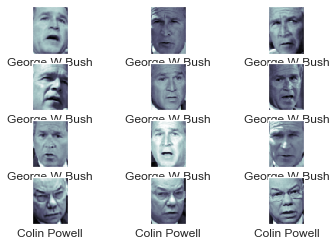

In [9]:
#Lets plot few of them:
fig, ax = plt.subplots(4, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [10]:
faces

{'data': array([[109.333336 ,  99.666664 ,  85.333336 , ...,  88.666664 ,
          82.333336 ,  72.       ],
        [110.666664 , 151.       , 187.66667  , ..., 170.66667  ,
         167.33333  , 163.       ],
        [119.666664 , 142.66667  , 145.66667  , ...,  81.333336 ,
          59.666668 ,  25.666666 ],
        ...,
        [ 97.       ,  88.666664 ,  75.666664 , ...,   8.       ,
           6.3333335,   8.       ],
        [154.       , 148.33333  , 139.33333  , ...,  16.333334 ,
          19.333334 ,  23.666666 ],
        [ 91.       ,  95.666664 , 100.333336 , ...,  18.666666 ,
          34.333332 ,  43.333332 ]], dtype=float32),
 'images': array([[[109.333336 ,  99.666664 ,  85.333336 , ...,  75.666664 ,
          114.       , 154.33333  ],
         [104.       ,  91.       ,  82.       , ...,  65.       ,
           96.666664 , 141.66667  ],
         [103.       ,  92.       ,  85.333336 , ...,  69.       ,
           77.666664 , 121.       ],
         ...,
         [162.

In [11]:
X = faces.data

In [12]:
X

array([[109.333336 ,  99.666664 ,  85.333336 , ...,  88.666664 ,
         82.333336 ,  72.       ],
       [110.666664 , 151.       , 187.66667  , ..., 170.66667  ,
        167.33333  , 163.       ],
       [119.666664 , 142.66667  , 145.66667  , ...,  81.333336 ,
         59.666668 ,  25.666666 ],
       ...,
       [ 97.       ,  88.666664 ,  75.666664 , ...,   8.       ,
          6.3333335,   8.       ],
       [154.       , 148.33333  , 139.33333  , ...,  16.333334 ,
         19.333334 ,  23.666666 ],
       [ 91.       ,  95.666664 , 100.333336 , ...,  18.666666 ,
         34.333332 ,  43.333332 ]], dtype=float32)

In [13]:
y = faces.target
print(y)

[1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0
 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 0 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = False)

In [16]:
model1 = LogisticRegression()
model2 = SVC(kernel='linear')
model3 = DecisionTreeClassifier()

In [17]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
predictedfacestrain1 = model1.predict(X_train)
predictedfacestest1 = model1.predict(X_test)
predictedfacestrain2 = model2.predict(X_train)
predictedfacestest2 = model2.predict(X_test)
predictedfacestrain3 = model3.predict(X_train)
predictedfacestest3 = model3.predict(X_test)

In [19]:
confusion_matrix(y_train, predictedfacestrain1)
confusion_matrix(y_test, predictedfacestest1)

array([[41,  8],
       [ 7, 98]])

In [20]:
confusion_matrix(y_train, predictedfacestrain2)
confusion_matrix(y_test, predictedfacestest2)

array([[39, 10],
       [ 7, 98]])

In [21]:
confusion_matrix(y_train, predictedfacestrain3)
confusion_matrix(y_test, predictedfacestest3)

array([[23, 26],
       [19, 86]])

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print("Decision Tree Classification report")
print(classification_report(y_test, predictedfacestest3))

Decision Tree Classification report
              precision    recall  f1-score   support

           0       0.55      0.47      0.51        49
           1       0.77      0.82      0.79       105

    accuracy                           0.71       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.70      0.71      0.70       154



In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print("SVC Classification report")
print(classification_report(y_test, predictedfacestest2))

SVC Classification report
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        49
           1       0.91      0.93      0.92       105

    accuracy                           0.89       154
   macro avg       0.88      0.86      0.87       154
weighted avg       0.89      0.89      0.89       154



In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression Classification report")
print(classification_report(y_test, predictedfacestest1))

Logistic Regression Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        49
           1       0.92      0.93      0.93       105

    accuracy                           0.90       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



# Digits Data

In [ ]:
#Import the digit data:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

In [ ]:
#Visualizing the Data
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)